<a href="https://colab.research.google.com/github/saadkarim165/ObjectDetectionProject/blob/main/ObjectDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%markdown
#Object Detection Model

#Object Detection Model


In [ ]:
%%markdown 
## Importing Dependencies

## Importing Dependencies


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
import shutil as sh

from tqdm.auto import tqdm
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
!unzip /content/Vehicles-OpenImages.v1-416x416.yolokeras.zip

Archive:  /content/Vehicles-OpenImages.v1-416x416.yolokeras.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg  
 extracting: test/00dea1edf14f09ab_jpg.rf.KJ730oDTFPdXdJxvSLnX.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg  
 extracting: test/00e481ea1a520175_jpg.rf.MV6sZ8QCFwFeMYaI2tHm.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.7IkYAamjZhnwsoXSrwKt.jpg  
 extracting: test/08c8b73e0c2e296e_jpg.rf.effa65856584463c08848031cab357b9.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.USCbBYVcUICkLhuq07Lw.jpg  
 extracting: test/10c26c6598677a1f_jpg.rf.f72b2b91e750909f68fffeee777e9350.jpg  
 extracting: test/1ef77c61856d3b4b_jpg.rf.HZMSiUVx3WUcMIooJMZX.jpg  
 extracting: test/1ef77c61856d3b4b_jpg.rf.a528f50763101224fad39907062c5026.jpg  
 extracting: test/259ff749ac781352_jpg.rf.8acc4aba3916d2dd58c3acca8890194b.jpg  
 extractin

In [ ]:
train_dir = "/content/train"
test_dir = "/content/test"

print('Image(train): ', len(os.listdir(train_dir)))
print('Image(test): ', len(os.listdir(test_dir)))

Image(train):  880
Image(test):  128


In [ ]:
data = pd.read_csv("/content/train/_annotations.txt",header=None,delimiter='\t')
max_length=0
for i,j in data.iterrows():
  if len(j[0].split(' '))>max_length:
    max_length=len(j[0].split(' '))
  else:
    continue
print(max_length)

10


In [ ]:
len(data.iloc[217][0].split(' '))

4

In [ ]:
data=data.rename(columns={0: 'ImageName', 1: 'xmin',2: 'ymin',3: 'xmax',4: 'ymax',5: 'xmin2',6: 'ymin2',7: 'xmax2',8: 'ymax2'})

In [ ]:
data.iloc[217][0]

'089cc41a901b2653_jpg.rf.6743a24c01af44063b9c1968d6402f52.jpg 19,222,48,254,0 124,201,160,258,0 158,181,222,265,0'

In [ ]:
print(data.shape)
data.nunique()

(700, 9)


ImageName    700
xmin         204
ymin         188
xmax         160
ymax          93
xmin2         86
ymin2         54
xmax2         78
ymax2          5
dtype: int64

(416, 416, 3)
['19', '222', '48', '254']
['124', '201', '160', '258']
['158', '181', '222', '265']
{'point1': (19, 222), 'point2': (124, 201), 'point3': (158, 181)}


True

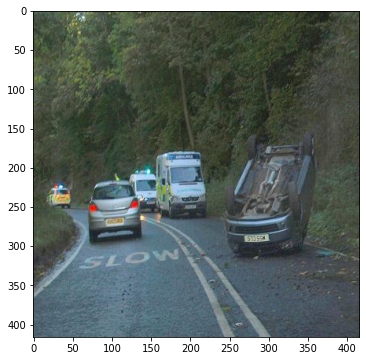

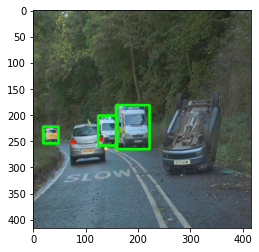

In [118]:
IMAGE_SHAPE = 0
points={}
points1={}
rand = 217
random_row = data.iloc[rand]
rand_list= random_row[0]
image = plt.imread(train_dir +'/'+ rand_list.split(' ')[0])
plt.figure(figsize=(8,6))
plt.imshow(image)
IMAGE_SHAPE = image.shape
print(image.shape)
list_values=rand_list.split(' ')
for i in range(1,len(list_values)):
  pnts=list_values[i].split(',')[:4]
  # print(pnts)
  points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
  points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
for i,j in enumerate(points):
  cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
plt.figure()
plt.imshow(image)
points['point2']==(124,201)

In [116]:
points

{'point1': (19, 222), 'point2': (124, 201), 'point3': (158, 181)}

(416, 416, 3)
(416, 416, 3)
(416, 416, 3)
(416, 416, 3)


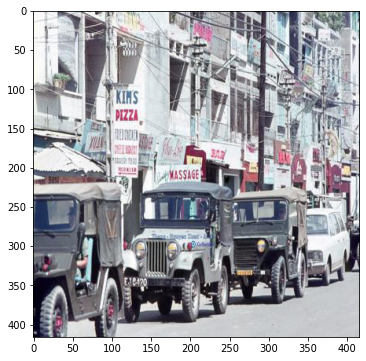

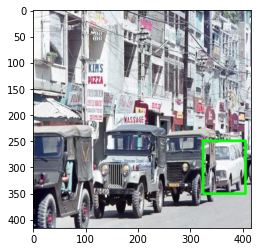

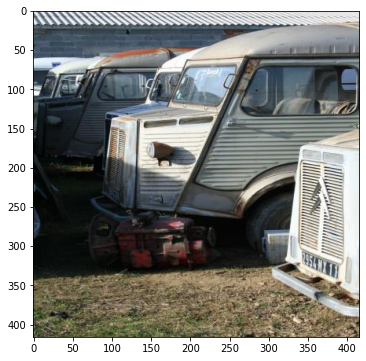

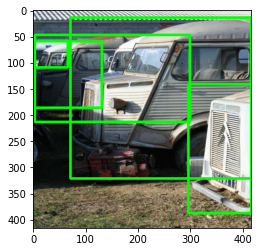

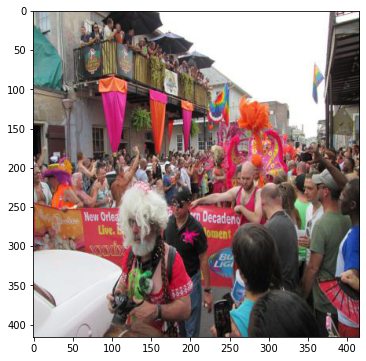

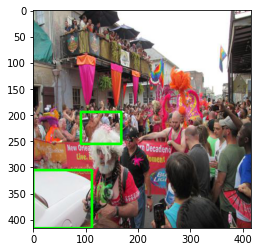

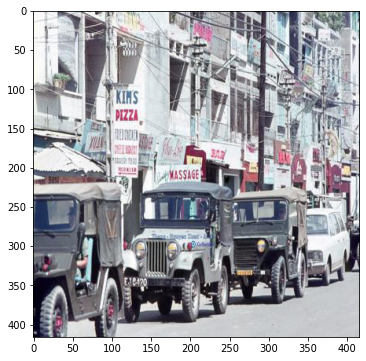

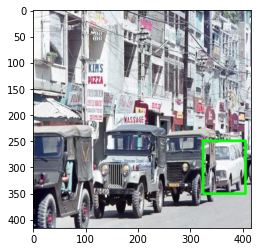

In [120]:
# IMAGE_SHAPE = 0
# for i in range(4):
#     rand = np.random.randint(0, data.shape[0])
#     random_row = data.iloc[rand]
#     image = plt.imread(train_dir +'/'+ random_row[0])
#     plt.figure()
#     plt.imshow(image)
#     IMAGE_SHAPE = image.shape
#     print(image.shape)
#     print('Name,xmin,ymin,xmax,ymax:',random_row)
#     point1 = (int(random_row[1]), int(random_row[2]))
#     point2 = (int(random_row[3]), int(random_row[4]))
#     cv2.rectangle(image, point1, point2, color=(0, 255, 0), thickness=3)
#     plt.figure()
#     plt.imshow(image)

IMAGE_SHAPE = 0
for i in range(4):
  points={}
  points1={}
  rand = np.random.randint(0, data.shape[0])
  random_row = data.iloc[rand]
  rand_list= random_row[0]
  image = plt.imread(train_dir +'/'+ rand_list.split(' ')[0])
  plt.figure(figsize=(8,6))
  plt.imshow(image)
  IMAGE_SHAPE = image.shape
  print(image.shape)
  list_values=rand_list.split(' ')
  for i in range(1,len(list_values)):
    pnts=list_values[i].split(',')[:4]
  # print(pnts)
    points["point{0}".format(i)] = int(pnts[0]), int(pnts[1])
    points1["point{0}".format(i)] = int(pnts[2]), int(pnts[3])
# print(points)
  for i,j in enumerate(points):
    cv2.rectangle(image,points[j], points1[j], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point2'], points1['point2'], color=(0, 255, 0), thickness=3)
# cv2.rectangle(image,points['point3'], points1['point3'], color=(0, 255, 0), thickness=3)
  plt.figure()
  plt.imshow(image)


['bdc6ddcd3b5129bb_jpg.rf.00da54335aeba68b1d59d976f1f7c3d3.jpg 41,163,155,303,1 143,136,416,350,1\n', 'b61201eee8903342_jpg.rf.00edd486466508ba478ce7709da69352.jpg 216,44,407,378,1 44,48,235,356,1\n', '2b9ced539656ae78_jpg.rf.09375be44a0f433daca7f5d9d5a69aa1.jpg 42,128,162,247,2\n', '6704ff10a79cf50f_jpg.rf.03b95bd8ac711d2eba2e5edaf09318b4.jpg 0,70,79,323,0 75,62,343,365,0 309,94,415,309,0\n', 'ca00cc1e9f910cfa_jpg.rf.050bd662c9b06cd0b9b90bf08ac1247b.jpg 37,58,397,390,2 242,20,332,76,2 329,38,369,83,2 361,35,415,202,2\n', 'bb77a64dbce401ed_jpg.rf.0595e0a7911e709f9e8716977eec3dd2.jpg 25,111,381,359,2 373,98,415,200,2\n', '011a8a0a921c2376_jpg.rf.064272f1b667f68b4340d240244ff7e8.jpg 0,0,398,415,4\n', 'dc8bd5855688ad54_jpg.rf.01614de7d7ff5420962415f25eaa4028.jpg 5,206,159,268,2 257,204,409,270,2 345,302,416,416,2\n', '0b35c604f8a87bd0_jpg.rf.0771220380bd5aa3d252ce58471bf2c7.jpg 0,44,145,283,0 1,58,35,130,0 50,17,336,363,0\n', '1c64bff45216007f_jpg.rf.00472dc1dcd49262a84274a23e3a1999.jpg 4

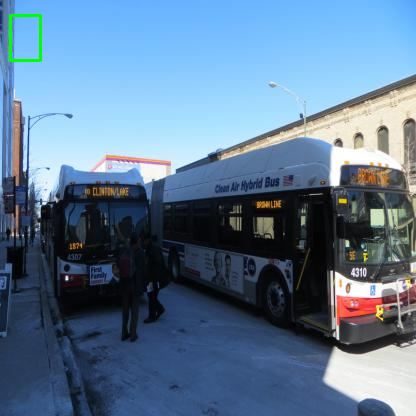

In [ ]:
image = cv2.imread("/bdc6ddcd3b5129bb_jpg.rf.vGGKLMAv30Zlex9EOx9X.jpg")
with open("/_annotations.txt", "r") as f:

  lines = f.readlines()
  print(lines)

for line in lines_1:
  x, y, w, h = (10,15,30,45) # Draw the box on the image
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2) # Display the image with the annotations
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
cv2_imshow?